# Ridge Regression and Regularization

Regularize your way to a better tomorrow.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge # NEW!
from sklearn.linear_model import RidgeCV # NEW!
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # NEW!

plt.style.use('seaborn')

**Resources**
- [What is regularization in machine learning](https://www.quora.com/What-is-regularization-in-machine-learning) - quora
- [how to use regularization to prevent model overfitting](https://blogs.sas.com/content/subconsciousmusings/2017/07/06/how-to-use-regularization-to-prevent-model-overfitting/) - The SAS Data Science Blog
- [introduction to regularization to reduce overfitting and improve generalization error](https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/) - machinelearningmastery
- [ridge and lasso regression a complete guide with-python scikit-learn](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b) - towardsdatascience
- [Question about Standardizing in Ridge Regression](https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression#111022) - stackexchange
- [StatQuest: Regularization Part 1: Ridge](https://www.youtube.com/watch?v=Q81RR3yKn30) - YouTube
- [StatQuest: Regularization Part 2: Lasso](https://www.youtube.com/watch?v=NGf0voTMlcs) - YouTube

## Well-Posed Problems

Data science depends on math, and math is generally focused on situations where:

1. a solution exists,
2. the solution is unique,
3. the solution's behavior changes continuously with the initial conditions.

These are known as [well-posed problems](https://en.wikipedia.org/wiki/Well-posed_problem), and are the sorts of assumptions so core in traditional techniques that it is easy to forget about them. But they do matter, as there can be exceptions:

1. no solution - e.g. no $x$ such that $Ax = b$
2. multiple solutions - e.g. several $x_1, x_2, ...$ such that $Ax = b$
3. "chaotic" systems - situations where small changes in initial conditions interact and reverberate in essentially unpredictable ways - for instance, the difficulty in longterm predictions of weather (N.B. not the same thing as longterm predictions of *climate*) - you can think of this as models that fail to generalize well, because they overfit on the training data (the initial conditions)

Problems suffering from the above are called ill-posed problems. Relating to linear algebra and systems of equations, the only truly well-posed problems are those with a single unique solution.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c0/Intersecting_Lines.svg" width=200>

Think for a moment - what would the above plot look like if there was no solution? If there were multiple solutions? And how would that generalize to higher dimensions?

A lot of what we covered with linear regression was about getting matrices into the right shape for them to be solvable in this sense. But some matrices just won't submit to this, and other problems may technically "fit" linear regression but still be violating the above assumptions in subtle ways.

[Overfitting](https://en.wikipedia.org/wiki/Overfitting) is in some ways a special case of this - an overfit model uses more features/parameters than is "justified" by the data (essentially by the *dimensionality* of the data, as measured by $n$ the number of observations). As the number of features approaches the number of observations, linear regression still "works", but it starts giving fairly perverse results. In particular, it results in a model that fails to *generalize* - and so the core goal of prediction and explanatory power is undermined.

How is this related to well and ill-posed problems? It's not clearly a no solution or multiple solution case, but it does fall in the third category - overfitting results in fitting to the "noise" in the data, which means the particulars of one random sample or another (different initial conditions) will result in dramatically different models.

**Two Equations with Two Unknowns (well-posed)**

In [2]:
#  x - y = -1
# 3x + y =  9

A = np.array([[1, -1], 
              [3,  1]])
b = np.array([[-1],
              [ 9]])

solution = np.linalg.solve(A, b)
print(solution)
print("x:", solution[0][0])
print("y:", solution[1][0])

[[2.]
 [3.]]
x: 2.0
y: 3.0


**Two Equations with Three Unknowns (not well-posed)**

In [3]:
#  x - y +  z = -1
# 3x + y - 2z =  9

A = np.array([[ 1, -1,  1], 
              [ 3,  1, -2]])
b = np.array([[-1],
              [ 9]])

try:
    print(np.linalg.solve(A, b))
except np.linalg.LinAlgError as e:
    print('LinAlgError:', e)

LinAlgError: Last 2 dimensions of the array must be square


You can reduce these formulas, but there is no single solution, there are infinitely many solutions where the solution to at least one of these variables must be a function of the other variables.

Example: [Solving a System of 2 Equations with 3 Unknowns - Infinitely Many Solutions - YouTube](https://www.youtube.com/watch?v=tGPSEXVYw_o)

# Generalization in Machine Learning

The goal of machine learning is to end up with a model that can predict well on new data that it has never seen before. This is sometimes called "out of sample accuracy". This is what we are simulating when we do a train-test-split. We fit our model to the training dataset and then test its ability to generalize by evaluating its accuracy on a test dataset. We want models that will be usable on new data indefinitely. We can train them once and reap the rewards of accurate predictions for a long time to come. 

### Underfitting
An underfit model will not perform well on the test data and will also not generalize to new data. Because of this, we can usually detect it easily (it just performs poorly in all situations - be it train or test). Because it's easy to identify we either remedy it quickly or move onto new methods. 

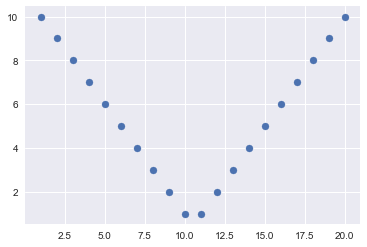

In [4]:
X = np.array(list(range(1,21)))
y = np.array(list(range(10, 0,-1)) + 
             list(range( 1,11, 1)))

plt.scatter(X,y)
plt.show()

Score: 0.022905834115949375
Slope: 0.08532423208191127
Intrc: 3.5955631399317407
Train


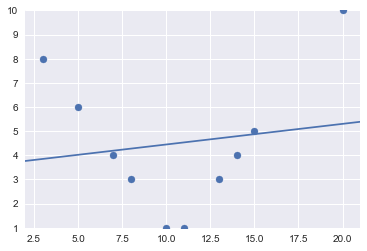

Test


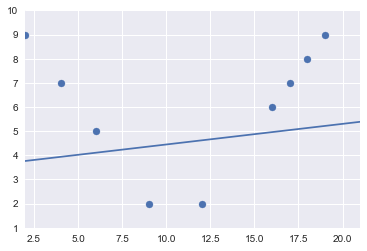

In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, random_state=42)

X_train = X_train.reshape(-1, 1)

model = LinearRegression().fit(X_train, y_train)

score = model.score(X_train, y_train)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print("Score:", score)
print("Slope:", beta_1)
print("Intrc:", beta_0)
print('Train')
plt.scatter(X_train, y_train)
plt.plot([beta_1*x + beta_0 for x in range(25)])
plt.xlim(2, 21); plt.ylim(1, 10)
plt.show()
print('Test')
plt.scatter(X_test, y_test)
plt.plot([beta_1*x + beta_0 for x in range(25)])
plt.xlim(2, 21); plt.ylim(1, 10)
plt.show()

### Overfitting

Lets explore the problem of overfitting (and possible remedy - Ridge Regression) in the context of some housing data.

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.data = scale(boston.data)  # Very helpful for regularization!

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


**`preprocessing.scale(x)` does the same thing as `preprocessing.StandardScaler()`**

* `.scale(x)` is a function (lowercase naming convention)
* `StandardScaler()` is a class (uppercase naming convention) with some extra functionality
* they will both scale our data equally well. 

In [7]:
df.shape

(506, 14)

In [8]:
# ordinary least squares regression
X = df.drop('Price', axis='columns')
y = df.Price

lin_reg = LinearRegression().fit(X, y)
lin_reg_mse = mean_squared_error(y, lin_reg.predict(X))
print('lin_reg_mse:', lin_reg_mse)

lin_reg_mse: 21.897779217687496


That seems like a pretty good score, but **chances are this doesn't generalize very well**.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

lin_reg_split = LinearRegression().fit(X_train, y_train)
lin_reg_train_mse = mean_squared_error(y_train, lin_reg_split.predict(X_train))
lin_reg_test_mse = mean_squared_error(y_test, lin_reg_split.predict(X_test))
print('lin_reg_train_mse:', lin_reg_train_mse)
print('lin_reg_test_mse:', lin_reg_test_mse)

lin_reg_train_mse: 21.029681497804216
lin_reg_test_mse: 26.289329463402495


When split into train and test, we see evidence of overfitting. We fitting well to training data, but did not generalize well to test data. What can we do?

- **Use fewer features.** But it can be a lot of work to figure out *which* features, and (in cases like this) there may not be any good reason to really favor some features over another.
- **Get more data.** This is actually a pretty good approach in tech, since apps generate lots of data all the time (and we made this situation by artificially constraining our data). But for case studies, existing data, etc. it won't work.
- **Regularize!**

# Regularization

**Intuition:** Regularization just means "add bias". There's more to it than that, but that's the core intuition.

Our model is working "too well", so we fix it by making it harder for the model! A technique that is purposefully "worse" can actually get better results.

In the context of statistics and machine learning, **bias** is when a predictive model fails to identify relationships between features and the output. In a word, bias is *underfitting*.

We want to add bias to the model because of the [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) - variance is the sensitivity of a model to the random noise in its training data (i.e. *overfitting*), and bias and variance are naturally (inversely) related. Increasing one will always decrease the other, with regards to the overall generalization error (predictive accuracy on unseen data).

Visually, the result looks like this:

<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Regularization.svg" width=200>

* Both lines are "overfit" - they both include all data points.
* The **blue line** uses more extreme coefficients than are needed (we assume both lines have the same polynomial terms). We can intuit that much of the movement is based on noise and it won't generalize well.
* The **green line** is less susceptible to the noise - depending on how exactly we parameterize "noise" we may throw out actual correlation, but if we balance it right we keep that signal and greatly improve generalizability.

## Regularization via ridge regression in `sklearn`

In [11]:
print('lin_reg_mse      :', lin_reg_mse)
print('lin_reg_train_mse:', lin_reg_train_mse)
print('lin_reg_test_mse :', lin_reg_test_mse)

lin_reg_mse      : 21.897779217687496
lin_reg_train_mse: 21.029681497804216
lin_reg_test_mse : 26.289329463402495


In [12]:
# Now with regularization via ridge regression
ridge_reg = Ridge().fit(X, y)
ridge_reg_mse = mean_squared_error(y, ridge_reg.predict(X))
print(ridge_reg_mse)

21.898810371392408


Without train-test split, the score is a bit worse than OLS - but that's expected since we've added bias.

In [13]:
ridge_reg_split = Ridge().fit(X_train, y_train)
print('ridge_reg_train_mse:', mean_squared_error(y_train, ridge_reg_split.predict(X_train)))
print('ridge_reg_test_mse :', mean_squared_error(y_test, ridge_reg_split.predict(X_test)))

ridge_reg_train_mse: 21.031679586531656
ridge_reg_test_mse : 26.2071348196642


A little better! Can we improve it further? We used default arguments to `Ridge()`, but as always there are plenty of parameters.

In [14]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as
 |      LogisticRegression or LinearSVC. If an

How to tune alpha? For now, let's loop and try values. (For longterm/stretch/next week, check out [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).)

In [15]:
mses = {}
for a in range(0, 150, 1):
    ridge_reg_split = Ridge(alpha=a).fit(X_train, y_train)
    mses[a] = mean_squared_error(y_test, ridge_reg_split.predict(X_test))

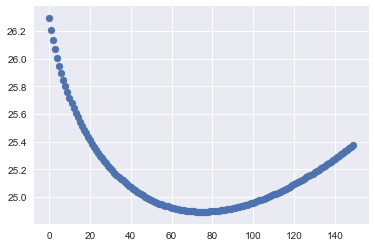

In [16]:
plt.scatter(mses.keys(), mses.values());

## The Inuition

The `alpha` parameter corresponds to the weight being given to the extra penalty being calculated by [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) (this parameter is sometimes referred to as $\lambda$ in the context of ridge regression).

Normal linear regression (OLS) minimizes the **sum of square error of the residuals**.

Ridge regression minimizes the **sum of square error of the residuals** *AND* **the squared slope of the fit model, times the alpha parameter**.

Therfore a Ridge model with `alpha=0` is the same as that found via linear regression!

As `alpha` is increased, we give more and more penalty to a steep slope. In two or three dimensions this is fairly easy to visualize - beyond, think of it as penalizing coefficient size. Each coefficient represents the slope of an individual dimension (feature) of the model, so ridge regression is just squaring and summing those.

So while `alpha=0` reduces to OLS, as `alpha` approaches infinity eventually the penalty gets so extreme that the model will always output every coefficient as 0 (any non-zero coefficient resulting in a penalty that outweighs whatever improvement in the residuals), and just fit a flat model with intercept at the mean of the dependent variable.

Of course, what we want is somewhere in-between these extremes. Intuitively, we want to apply an appropriate cost/penalty to the model for fitting parameters, much like adjusted $R^2$ takes into account the cost of adding complexity to a model. The "appropriate" penalty will vary.

**Note:** scaling the data helps. Then our cost is consistent and can be added uniformly across features, and it is simpler to search for the `alpha` parameter.

### Bonus - magic! ✨

Ridge regression doesn't just reduce overfitting and help with the third aspect of well-posed problems (poor generalizability). It can also fix the first two (no unique solution)!

In [17]:
df_tiny = df.sample(10, random_state=27)
print(df_tiny.shape)
X = df_tiny.drop('Price', axis='columns')
y = df_tiny.Price

lin_reg = LinearRegression().fit(X, y)
print(lin_reg.score(X, y))

(10, 14)
1.0


Perfect multi-collinearity! True OLS would 💥 here. `sklearn` protects us from actual error, but still gives a poor model

In [18]:
ridge_reg = Ridge().fit(X, y)
ridge_reg.score(X, y)  # More plausible (not "perfect")

0.9760117162191433

In [19]:
# Using our earlier test split
mean_squared_error(y_test, lin_reg.predict(X_test))

103.04382934850027

In [20]:
# Ridge generalizes *way* better, even wihtout tuning our alpha
mean_squared_error(y_test, ridge_reg.predict(X_test))

41.79815954870069

In [21]:
# from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=list(range(0,20))).fit(X, y)
ridgecv.score(X, y)
print('Best alpha:', ridgecv.alpha_)
print(mean_squared_error(y_test, ridgecv.predict(X_test)))

Best alpha: 5
34.93410392845076


## And a bit more math

The regularization used by Ridge Regression is also known as **$L^2$ regularization**, due to the squaring of the slopes being summed. This corresponds to [$L^2$ space](https://en.wikipedia.org/wiki/Square-integrable_function), a metric space of square-integrable functions that generally measure what we intuitively think of as "distance" (at least, on a plane) - what is referred to as Euclidean distance.

The other famous norm is $L^1$, also known as [taxicab geometry](https://en.wikipedia.org/wiki/Taxicab_geometry), because it follows the "grid" to measure distance like a car driving around city blocks (rather than going directly like $L^2$). When referred to as a distance this is called "Manhattan distance", and can be used for regularization (see [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics%29), which [uses the $L^1$ norm](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when)).

All this comes down to - regularization means increasing model bias by "watering down" coefficients with a penalty typically based on some sort of distance metric, and thus reducing variance (overfitting the model to the noise in the data). It gives us another lever to try and another tool for our toolchest!

# Example 2: Putting it all together

The official scikit-learn documentation has many excellent examples - [this one](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py) illustrates how ridge regression effectively reduces the variance, again by increasing the bias, penalizing coefficients to reduce the effectiveness of features (but also the impact of noise).

```
Due to the few points in each dimension and the straight line that linear regression uses to follow these points as well as it can, noise on the observations will cause great variance as shown in the first plot. Every line’s slope can vary quite a bit for each prediction due to the noise induced in the observations.

Ridge regression is basically minimizing a penalised version of the least-squared function. The penalising shrinks the value of the regression coefficients. Despite the few data points in each dimension, the slope of the prediction is much more stable and the variance in the line itself is greatly reduced, in comparison to that of the standard linear regression
```

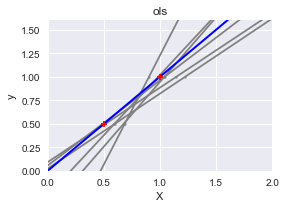

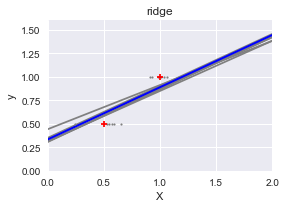

In [22]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=LinearRegression(),
                   ridge=Ridge(alpha=.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

Between the first and the second graph, we have decreased the slope (penalized or watered-down coefficients), but we have less variance between our lines)

# Example 3

Following is data describing characteristics of blog posts, with a target feature of how many comments will be posted in the following 24 hours.

https://archive.ics.uci.edu/ml/datasets/BlogFeedback

```
Attribute Information:

1...50: Average, standard deviation, min, max and median of the Attributes
51...60 for the source of the current blog post 
With source we mean the blog on which the post appeared. 
For example, myblog.blog.org would be the source of 
the post myblog.blog.org/post_2010_09_10 
51: Total number of comments before basetime 
52: Number of comments in the last 24 hours before the 
basetime 
53: Let T1 denote the datetime 48 hours before basetime, 
Let T2 denote the datetime 24 hours before basetime. 
This attribute is the number of comments in the time period 
between T1 and T2 
54: Number of comments in the first 24 hours after the 
publication of the blog post, but before basetime 
55: The difference of Attribute 52 and Attribute 53 
56...60: 
The same features as the attributes 51...55, but 
features 56...60 refer to the number of links (trackbacks), 
while features 51...55 refer to the number of comments. 
61: The length of time between the publication of the blog post 
and basetime 
62: The length of the blog post 
63...262: 
The 200 bag of words features for 200 frequent words of the 
text of the blog post 
263...269: binary indicator features (0 or 1) for the weekday 
(Monday...Sunday) of the basetime 
270...276: binary indicator features (0 or 1) for the weekday 
(Monday...Sunday) of the date of publication of the blog 
post 
277: Number of parent pages: we consider a blog post P as a 
parent of blog post B, if B is a reply (trackback) to 
blog post P. 
278...280: 
Minimum, maximum, average number of comments that the 
parents received 
281: The target: the number of comments in the next 24 hours 
(relative to basetime)
```

Investigate - you can try both linear and ridge. You can also sample to smaller data size and see if that makes ridge more important. Don't forget to scale!

Focus on the training data, but if you want to load and compare to any of the test data files you can also do that.

Note - Ridge may not be that fundamentally superior in this case. That's OK! It's still good to practice both, and see if you can find parameters or sample sizes where ridge does generalize and perform better.

When you've fit models to your satisfaction, answer the following question:

```
Did you find cases where Ridge performed better? If so, describe (alpha parameter, sample size, any other relevant info/processing). If not, what do you think that tells you about the data?
```

You can create whatever plots, tables, or other results support your argument. In this case, your target audience is a fellow data scientist, *not* a layperson, so feel free to dig in!

In [23]:
# install and import personal library, extract data zip file from url
# !pip install --upgrade git+https://github.com/chrisluedtke/clued.git
# from clued.get_data import extract_zip_url, get_uci_data_urls

# uci_url = 'https://archive.ics.uci.edu/ml/datasets/BlogFeedback'
# data_url = get_uci_data_urls(uci_url)
# extract_zip_url(data_url[0], write_path='datasets/blogfeedback')

https://archive.ics.uci.edu/ml/machine-learning-databases/00304/BlogFeedback.zip


In [24]:
pd.options.display.max_columns = None
df = pd.read_csv('datasets/blogfeedback/blogData_train.csv', header=None)

In [25]:
print(df.shape)

(52397, 281)


In [26]:
# 51: n_comments_cum_before
# 52: n_comments_24h_before
# 53: n_comments_24h72h_before
# 54: n_comments_24h_after_post
# 55: The difference of Attribute 52 and Attribute 53 
# 56...60

In [27]:
X = df.iloc[:, 0:280].values
X = scale(X)
y = df.iloc[:,   280].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
mses = {}
for a in range(350, 450, 10):
    model = Ridge(alpha=a).fit(X_train, y_train)
    mses[a] = mean_squared_error(y_test, model.predict(X_test))

In [29]:
mses
# alpah ~ 400

{350: 918.2008943850715,
 360: 918.2001599150349,
 370: 918.199586155073,
 380: 918.1991705593872,
 390: 918.1989104588843,
 400: 918.1988030859445,
 410: 918.1988455963532,
 420: 918.1990350886326,
 430: 918.1993686210125,
 440: 918.1998432262698}

In [31]:
model = Ridge(alpha=400).fit(X_train, y_train)
print(mean_squared_error(y_train, model.predict(X_train)))
print(mean_squared_error(y_test, model.predict(X_test)))

902.3161003682391
918.1988030859445


Still overfit!

**Stretch goals**
- Revisit past data you've fit OLS models to, and see if there's an `alpha` such that ridge regression results in a model with lower MSE on a train/test split
- Yes, Ridge can be applied to classification! Check out [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), and try it on a problem you previous approached with a different classifier (note - scikit LogisticRegression also automatically penalizes based on the $L^2$ norm, so the difference won't be as dramatic)
- Implement your own function to calculate the full cost that ridge regression is optimizing (the sum of squared residuals + `alpha` times the sum of squared coefficients) - this alone won't fit a model, but you can use it to verify cost of trained models and that the coefficients from the equivalent OLS (without regularization) may have a higher cost